# REGRESSION

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory data analysis

In [18]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
space = data [['sqft_living']]
price = data [['price']]

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


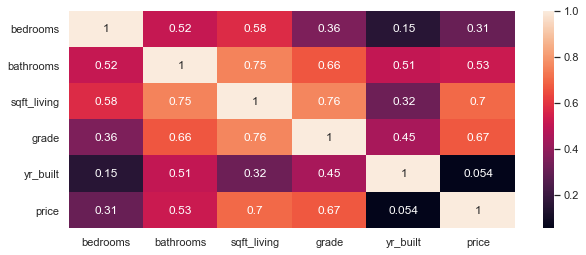

In [20]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(data[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built', 'price']].corr(), annot=True)
plt.show()

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

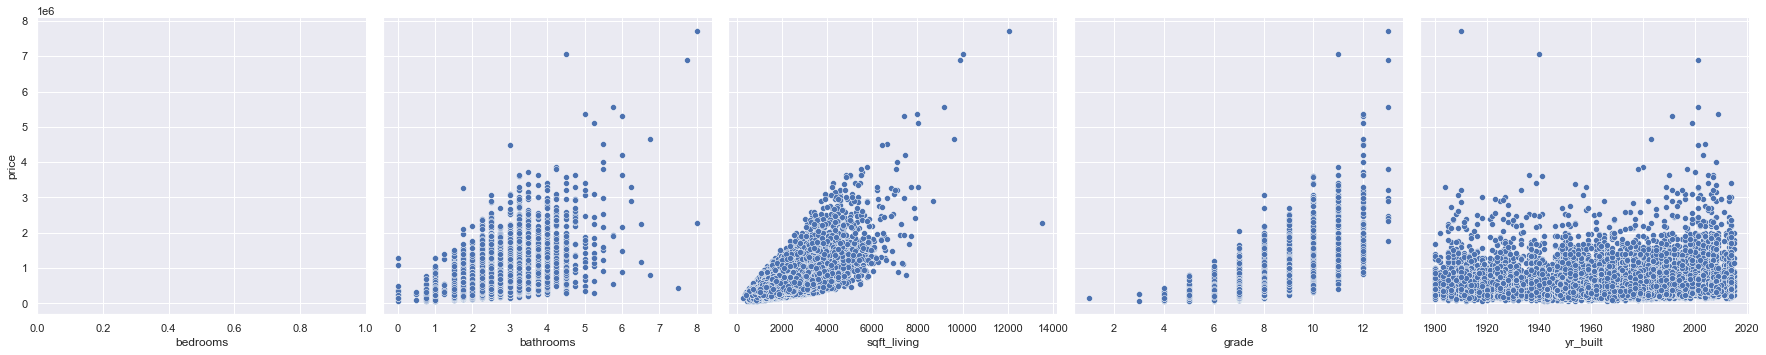

In [21]:
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5)
plt.show()

### Preprocessing

In [22]:
data_pre = data.copy()

Q1 = data_pre['price'].quantile(0.25)
Q3 = data_pre['price'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_pre['price'] >= low_limit) & (data_pre['price'] <= high_limit))
data_pre = data_pre[filtered_entries]

In [23]:
features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

for var in features:
    data_pre[var]= (data[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    data_pre[var]= MinMaxScaler().fit_transform(data_pre[var].values.reshape(len(data_pre), 1))

In [24]:
data_pre.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,0.393123,0.323891,0.431438,0.295712,0.0,0.0,0.0,...,0.740620,0.470566,0.000000,0.485594,0.000000,98178,47.5112,-122.257,0.465421,0.300037
1,6414100192,20141209T000000,538000.0,0.393123,0.550756,0.671039,0.326501,0.5,0.0,0.0,...,0.740620,0.675088,0.757889,0.450741,0.998426,98125,47.7210,-122.319,0.554644,0.341935
2,5631500400,20150225T000000,180000.0,0.311543,0.323891,0.300100,0.366525,0.0,0.0,0.0,...,0.669282,0.327317,0.000000,0.293015,0.000000,98028,47.7379,-122.233,0.737656,0.349422
3,2487200875,20141209T000000,604000.0,0.456402,0.647781,0.587621,0.280554,0.0,0.0,0.0,...,0.740620,0.431390,0.861645,0.572415,0.000000,98136,47.5208,-122.393,0.471117,0.283060
4,1954400510,20150218T000000,510000.0,0.393123,0.513354,0.540169,0.340082,0.0,0.0,0.0,...,0.803545,0.589158,0.000000,0.761877,0.000000,98074,47.6168,-122.045,0.578891,0.339440


### Test & Train split

In [26]:
x = data_pre.drop(columns=['price','id','date']) 
y = data_pre['price']

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42)

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

### Predict

In [31]:
pred = regressor.predict(xtest)

### Evaluation

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [35]:
pred = regressor.predict(xtest)
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-2.35952156e+05  1.24123514e+05  1.76349485e+05  8.53782119e+04
  6.06885429e+04  1.56861616e+05  1.10401389e+05  1.24032583e+05
  1.13534986e+06  2.89475510e+05  4.93870040e+04 -2.18382639e+05
  2.18790663e+04 -2.27812921e+02  5.41237204e+05 -1.45692051e+04
  2.78917574e+05 -1.38906455e+05]
Intercept: 
 -5939009.713415556
MAE: 89160.90
RMSE: 117102.67
R2 score: 0.67


In [36]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.6860354207667316
test Accuracy :  0.6732150874295988


steps below are optional since there's no indication of overfitting

# RIDGE

In [37]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 89152.66
RMSE: 117104.57
R2 score: 0.67


### Hyperparameter Tuning

use solver 'saga' or 'sag' for simpler calculation

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [39]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 89283.78
RMSE: 117224.72
R2 score: 0.67


In [40]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best solver: cholesky
Best alpha: 1


# LASSO

In [41]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 89158.95
RMSE: 117101.37
R2 score: 0.67


### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03]
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

best_model = clf.fit(xtrain, ytrain)

pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MAE: 89160.84
RMSE: 117102.63
R2 score: 0.67


# ELASTIC NET

In [43]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 155803.62
RMSE: 192490.52
R2 score: 0.12


### Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')
best_model = clf.fit(xtrain, ytrain)

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75869898619802.61, tolerance: 48114632762.58936
  model = cd_fast.enet_coordinate_descent(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advise

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75869898619802.95, tolerance: 48114632762.58936
  model = cd_fast.enet_coordinate_descent(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase 

In [47]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 89159.51
RMSE: 117102.01
R2 score: 0.67
